# **LAB 4 - PART 2 Multi Layers Perceptron**

<font color="Orange">**NOTE**</font> : In this lab, you will need to use PyTorch. Please refer to the PyTorch documentation for installation instructions: https://pytorch.org.


In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

Create Sine dataset with 9 sampling point as a activity sheet.<br>
Then, plot the dataset.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

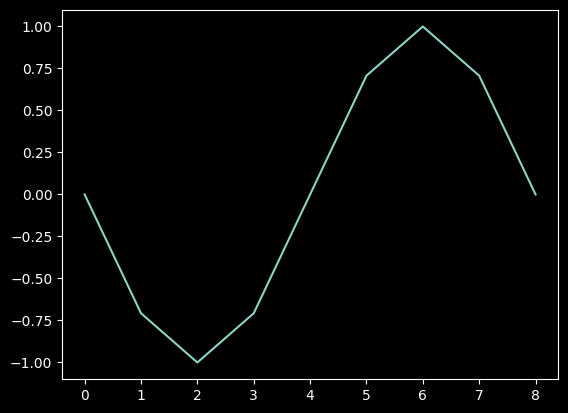


</details>

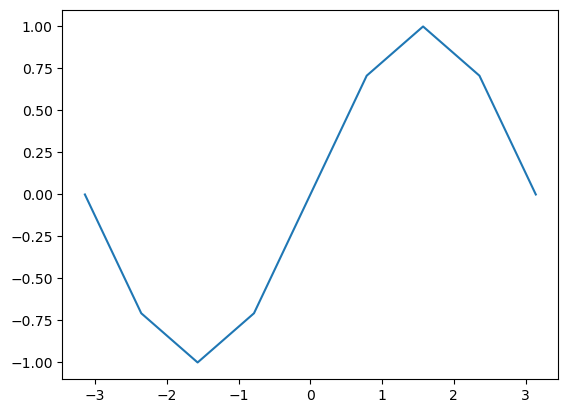

In [2]:
### START CODE HERE ###
# If you use actual degree value here, output will be a single line (May be because it alters between negative and positive but we use relu)
X = np.vectorize(np.deg2rad)( np.linspace(-180, 180, 9) ).reshape(-1, 1)        # Convert to single column
Y = np.sin(X).reshape(-1, 1)

plt.plot(X, Y)
plt.show()
### END CODE HERE ###

**Define the Multi Layers Perceptron class using pytorch.**<br>
Using `nn.Linear()` and `nn.ReLU()`

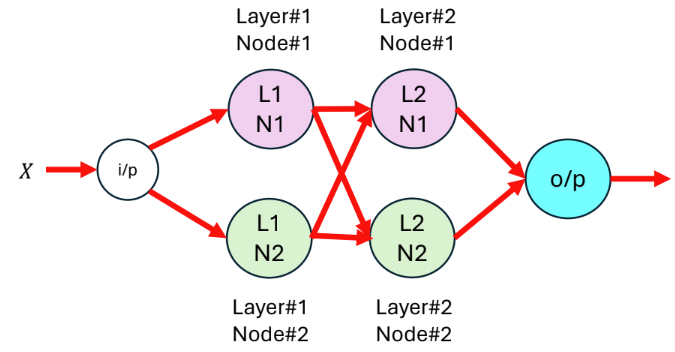

In [3]:
### START CODE HERE ###
class MLP(nn.Module):
    def __init__(self, input_size=1, hidden_size=2, output_size=1):
        """
        Multi-Layer Perceptron (MLP) class.

        Args:
            input_size (int): The size of the input layer.
            hidden_size (int): The size of the hidden layer.
            output_size (int): The size of the output layer.
        """
        super(MLP, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        Forward pass of the MLP.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            in_fc1: This represents the input to the first fully connected layer (fc1). It is obtained by passing the input tensor x through the fc1 layer.

            fc1_x: This represents the output of the first fully connected layer (fc1) after applying the ReLU activation function. It is obtained by passing in_fc1 through the ReLU activation function.

            in_fc2: This represents the input to the second fully connected layer (fc2). It is obtained by passing fc1_x through the fc2 layer.

            fc2_x: This represents the output of the second fully connected layer (fc2) after applying the ReLU activation function. It is obtained by passing in_fc2 through the ReLU activation function.

            out: This represents the final output of the MLP model. It is obtained by passing fc2_x through the third fully connected layer (fc3).
        """
        
        in_fc1 = self.fc1(x)
        fc1_x = self.relu(in_fc1)
        in_fc2 = self.fc2(fc1_x)
        fc2_x = self.relu(in_fc2)
        out = self.fc3(fc2_x)
        return in_fc1, fc1_x, in_fc2, fc2_x, out

mlp = MLP()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(mlp.parameters(), lr=0.008)
print(mlp)
### END CODE HERE ###

MLP(
  (fc1): Linear(in_features=1, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=1, bias=True)
  (relu): ReLU()
)


**Load the initial model's weights that given in Lab Direction sheet.**<br>
please refer to this https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [4]:
### START CODE HERE ###
model_sate_dict = OrderedDict()
model_sate_dict['fc1.weight'] = torch.tensor([[0.9590], [-0.6742]])
model_sate_dict['fc1.bias'] = torch.tensor([-0.3777, 0.0178])

model_sate_dict['fc2.weight'] = torch.tensor([[-0.3664, 0.3738], [0.5779, 0.1787]])
model_sate_dict['fc2.bias'] = torch.tensor([-0.3471, 0.1519])

model_sate_dict['fc3.weight'] = torch.tensor([[0.5198, -0.0354]])
model_sate_dict['fc3.bias'] = torch.tensor([0.4454])
mlp.load_state_dict(model_sate_dict)
### END CODE HERE ###

<All keys matched successfully>

**Try to plot the output from each layers of weight loaded MLP**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

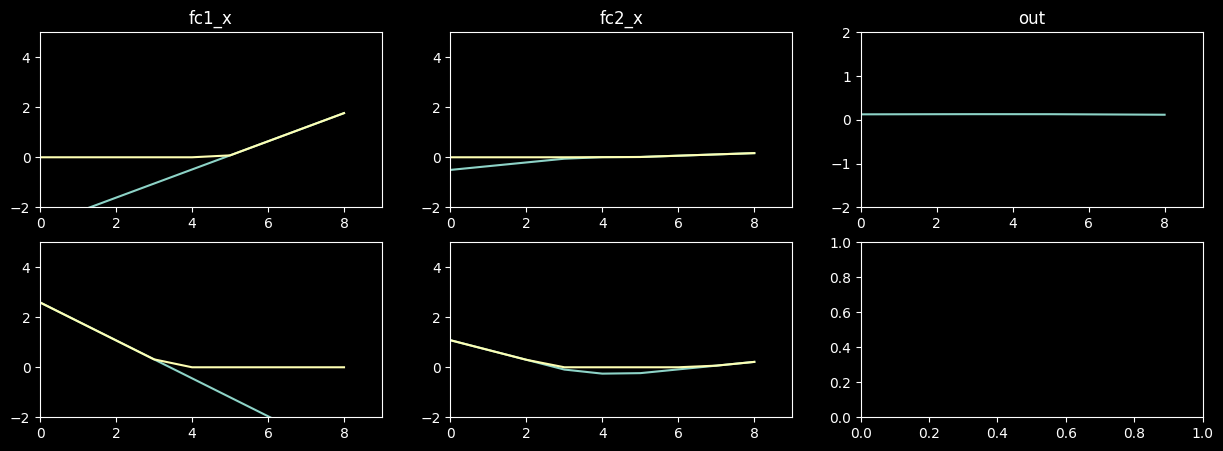


</details>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[-3.141592653589793, -1.2246467991473532e-16], [-2.356194490192345, -0.7071067811865476], [-1.5707963267948966, -1.0], [-0.7853981633974483, -0.7071067811865475], [0.0, 0.0], [0.7853981633974483, 0.7071067811865475], [1.5707963267948966, 1.0], [2.356194490192345, 0.7071067811865476], [3.141592653589793, 1.2246467991473532e-16]]


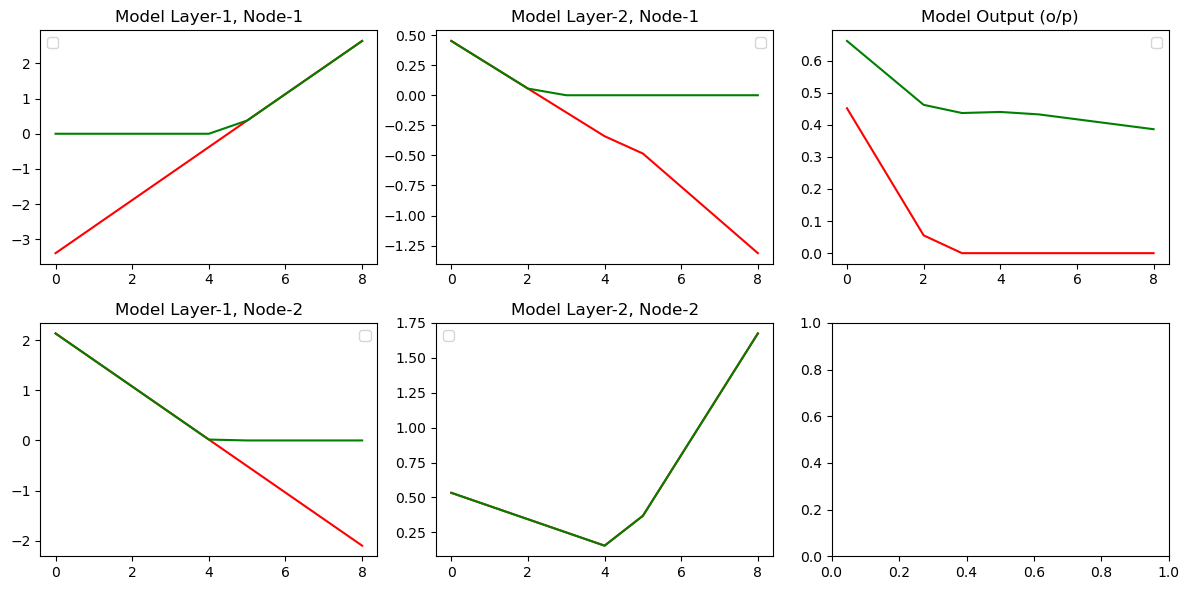

In [5]:
from collections import defaultdict

outputs = []
### START CODE HERE ###

dataset = np.matrix( np.hstack((X, Y)) ).tolist()
print(dataset)
dataset_tensor = torch.tensor(dataset).float()

in_fc1, fc1_x, in_fc2, fc2_x, out = mlp(dataset_tensor[:, 0].unsqueeze(1))
outputs.append({
    'in_fc1':in_fc1.detach().numpy(),
    'fc1_x':fc1_x.detach().numpy(),
    'in_fc2':in_fc2.detach().numpy(),
    'fc2_x':fc2_x.detach().numpy(),
    'out':out.detach().numpy()
})

def plotlayers(frame, fig, axs):
    lines = []
    
    # แสดงกราฟ Model Layer-1, Node-1
    lines.append(axs[0, 0].plot(frame['in_fc1'][:,0],  color='red'))
    lines.append(axs[0, 0].plot(frame['fc1_x'][:,0],   color="green"))
    axs[0, 0].set_title('Model Layer-1, Node-1')
    axs[0, 0].legend()

    # แสดงกราฟ Model Layer-1, Node-2
    lines.append(axs[1, 0].plot(frame['in_fc1'][:,1],  color='red'))
    lines.append(axs[1, 0].plot(frame['fc1_x'][:,1],   color="green"))
    axs[1, 0].set_title('Model Layer-1, Node-2')
    axs[1, 0].legend()

    # แสดงกราฟ Model Layer-2, Node-1
    lines.append(axs[0, 1].plot(frame['in_fc2'][:,0],  color='red'))
    lines.append(axs[0, 1].plot(frame['fc2_x'][:,0],   color="green"))
    axs[0, 1].set_title('Model Layer-2, Node-1')
    axs[0, 1].legend()

    # แสดงกราฟ Model Layer-2, Node-2
    lines.append(axs[1, 1].plot(frame['in_fc2'][:,1],  color='red'))
    lines.append(axs[1, 1].plot(frame['fc2_x'][:,1],   color="green"))
    axs[1, 1].set_title('Model Layer-2, Node-2')
    axs[1, 1].legend()

    # แสดงกราฟ Model Output (o/p)
    lines.append(axs[0, 2].plot(frame['fc2_x'][:,0],   color='red'))
    lines.append(axs[0, 2].plot(frame['out'][:,0],    color="green"))
    axs[0, 2].set_title('Model Output (o/p)')
    axs[0, 2].legend()

    # Flatten the list of lists into a single list of Line2D objects
    lines = [item for sublist in lines for item in sublist]
    return lines

fig, axs = plt.subplots(2, 3, figsize=(12, 6))
plotlayers(outputs[0],fig,axs)
# แสดง subplot
plt.tight_layout()
plt.show()
### END CODE HERE ###

**Train the MLP for n Epochs.**<br>
In the final part, you will need to save a GIF that animates how the output of each layer (similar to cell above) changes during the training loops.

In [6]:
### START CODE HERE ###
num_epochs = 10000
log_interval = 500
frame = []
lastout = None
for epoch in range(num_epochs):

    in_fc1, fc1_x, in_fc2, fc2_x, out = mlp(dataset_tensor[:, 0].unsqueeze(1))
    outputs = {}
    outputs['in_fc1'] =in_fc1.detach().numpy()
    outputs['fc1_x'] =fc1_x.detach().numpy()
    outputs['in_fc2'] =in_fc2.detach().numpy()
    outputs['fc2_x'] =fc2_x.detach().numpy()
    outputs['out'] =out.detach().numpy()

    loss = criterion(input=out, target=dataset_tensor[:, 1].unsqueeze(1))

    lastout = out
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % log_interval == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")
        frame.append(outputs)

### END CODE HERE ###

Epoch [500/10000], Loss: 0.33438217639923096
Epoch [1000/10000], Loss: 0.2815234363079071
Epoch [1500/10000], Loss: 0.2409423142671585
Epoch [2000/10000], Loss: 0.19608508050441742
Epoch [2500/10000], Loss: 0.15263763070106506
Epoch [3000/10000], Loss: 0.11298607289791107
Epoch [3500/10000], Loss: 0.08068358153104782
Epoch [4000/10000], Loss: 0.058995723724365234
Epoch [4500/10000], Loss: 0.046501148492097855
Epoch [5000/10000], Loss: 0.03993089124560356
Epoch [5500/10000], Loss: 0.03634576499462128
Epoch [6000/10000], Loss: 0.028694553300738335
Epoch [6500/10000], Loss: 0.01845618151128292
Epoch [7000/10000], Loss: 0.01272426825016737
Epoch [7500/10000], Loss: 0.009762400761246681
Epoch [8000/10000], Loss: 0.008274463936686516
Epoch [8500/10000], Loss: 0.007446564733982086
Epoch [9000/10000], Loss: 0.006882910151034594
Epoch [9500/10000], Loss: 0.006432976108044386
Epoch [10000/10000], Loss: 0.0060441200621426105


**Plot the final output compare to the original dataset.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

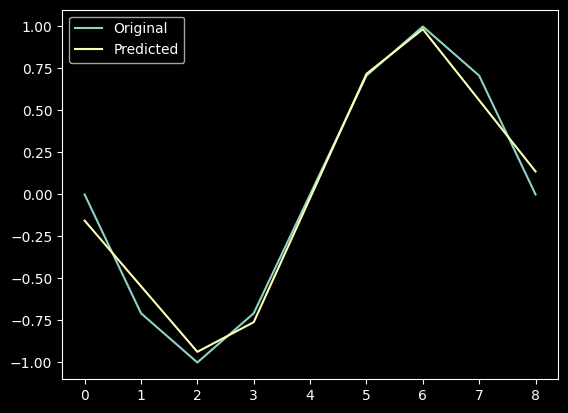


</details>

tensor([[-0.0996],
        [-0.5877],
        [-1.0152],
        [-0.7224],
        [ 0.0245],
        [ 0.7076],
        [ 1.0488],
        [ 0.5647],
        [ 0.0805]], grad_fn=<AddmmBackward0>)


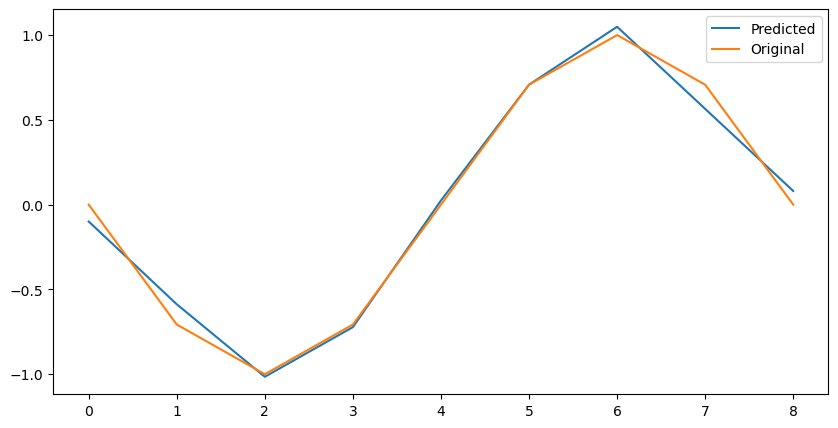

In [7]:
### START CODE HERE ###
print(lastout)
plt.figure(figsize=(10, 5))
plt.plot(lastout.detach().numpy(), label='Predicted')
plt.plot(dataset_tensor[:, 1].numpy(), label='Original')
plt.legend()
plt.show()
### END CODE HERE ###

**Save a GIF that animates how the output of each layer changes during the training loops**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

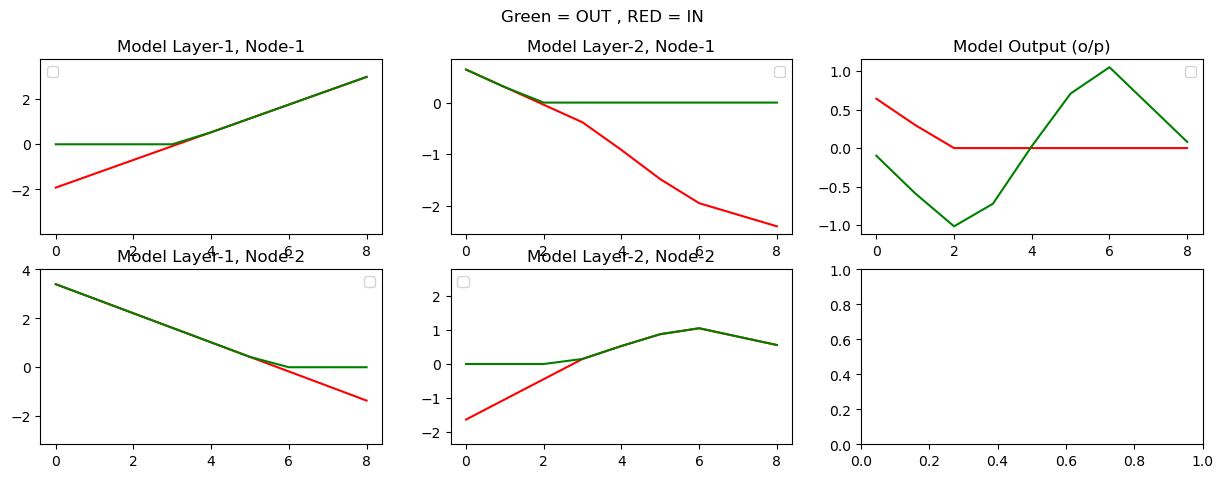

In [8]:
### START CODE HERE ###
from IPython.display import HTML
import matplotlib.animation as animation
fig, axs = plt.subplots(2, 3, figsize=(15, 5))
fig.suptitle('Green = OUT , RED = IN')  # Add this line to set the title
ims = []

for f in frame:
    # Clear the axes
    im = plotlayers(f,fig,axs)
    ims.append(im)
    
ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True)
ani_js = ani.to_jshtml()

HTML(ani_js)


### END CODE HERE ###

### Question
1. Calculate and describe a comparison of Mean Square Error (MSE) values between y_predict and y_real.
2. From the Node_result graphs, identify if there is any Node that changes the sign of the weight (slope) from the initial starting weight.
3. Does increasing the number of epochs to 80,000 or increasing/decreasing the learning_rate help reduce the MSE?
4. If the initial weights are changed as specified below, do they affect the number of training epoches and the final results (y_predict)? If there is an impact, Explain.
    model_sate_dict['fc1.weight'] -> [[0.1], [0.1]]
    model_sate_dict['fc1.bias'] -> [-0.1, 0.9]
    model_sate_dict['fc2.weight'] -> [[0.51, -0.1], [-0.5, 0.5]]
    model_sate_dict['fc2.bias'] -> [-0.45,0.1]
    model_sate_dict['fc3.weight'] -> [[-1.5, -0.8]]
    model_sate_dict['fc3.bias'] -> [0.5]